# Установка пакетов разработки

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install networkx
!pip install matplotlib seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 647.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00


# Функция для вычисления графовых характеристик

In [ ]:
import torch
import networkx as nx
from torch_geometric.datasets import Planetoid, OGB_MAG, PPI
from torch_geometric.utils import to_networkx
from networkx.algorithms.cluster import clustering
from networkx.algorithms.centrality import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality
from networkx.algorithms.smallworld import sigma

def compute_metrics(graph_data, to_undirected=True):
    """ Функция для вычисления характеристик графа"""
    # Конвертируем граф в формат NetworkX
    G = to_networkx(graph_data, to_undirected=to_undirected)

    # Степень вершины
    try:
      degree_dict = dict(G.degree())
      print(f"Degree: {degree_dict}")
    except Exception as err:
      print(f"Degree error: {str(err)}")
      degree_dict = None

    # Диаметр графа
    if to_undirected:
      diameter = nx.diameter(G) if nx.is_connected(G) else None
      print(f"Diameter: {diameter}")
    else:
      diameter = None
      print(f"Diameter not supported for directed graphs")


    # Кластерный коэффициент для вершин
    try:
      clustering_coeff = clustering(G)
      print(f"Clustering Coefficient: {clustering_coeff}")
    except Exception as err:
      print(f"Clustering Coefficient error: {str(err)}")
      clustering_coeff = None


    # Центральность по степени
    try:
      degree_cent = degree_centrality(G)
      print(f"Degree Centrality: {degree_cent}")
    except Exception as err:
      print(f"Degree Centrality error: {str(err)}")
      degree_cent = None


    # Центральность по близости
    try:
      closeness_cent = closeness_centrality(G)
      print(f"Closeness Centrality: {closeness_cent}")
    except Exception as err:
      print(f"Closeness Centrality error: {str(err)}")
      closeness_cent = None


    # Междуузловая центральность
    try:
      betweenness_cent = betweenness_centrality(G)
      print(f"Betweenness Centrality: {betweenness_cent}")
    except Exception as err:
      print(f"Betweenness Centrality error: {str(err)}")
      betweenness_cent = None


    # Собственная центральность
    try:
      eigenvector_cent = eigenvector_centrality(G)
      print(f"Eigenvector Centrality: {eigenvector_cent}")
    except Exception as err:
      print(f"Eigenvector Centrality error: {str(err)}")
      eigenvector_cent = None

    # Эксцентриситет
    try:
      eccentricity = dict(nx.eccentricity(G))
      print(f"Eccentricity: {eccentricity}")
    except Exception as err:
      print(f"Eccentricity error: {str(err)}")
      eccentricity = None


    # Количество треугольников
    try:
      triangles = nx.triangles(G)
      print(f"Triangle Count: {triangles}")
    except Exception as err:
      print(f"Triangle Count error: {str(err)}")
      triangles = None


    return {
        "degree": degree_dict,
        "diameter": diameter,
        "clustering_coeff": clustering_coeff,
        "degree_cent": degree_cent,
        "closeness_cent": closeness_cent,
        "betweenness_cent": betweenness_cent,
        "eigenvector_cent": eigenvector_cent,
        "eccentricity": eccentricity,
        "triangles": triangles
    }




# Датасеты CoraML, PubMed, OGB

In [ ]:
# Загружаем датасеты
def load_cora():
    return Planetoid(root='./data/Cora', name='Cora')[0]

def load_pubmed():
    return Planetoid(root='./data/PubMed', name='PubMed')[0]

def load_ogb():
    return OGB_MAG(root='./data/OGB')[0]

cora_graph = load_cora()
pubmed_graph = load_pubmed()
ogb_graph = load_ogb() # HeteroData object: https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.data.HeteroData.html


Processing...
Done!
Processing...
Done!
Extracting data/OGB/mag/raw/mag.zip
Processing...
Done!


In [ ]:
cora_graph.y

tensor([3, 4, 4,  ..., 3, 3, 3])

In [ ]:
cora_graph.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

# Вычисление характеристик графов и визуализация распределения

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric_distribution(metric_data, metric_name, dataset_name):
    """Функция для визуализации распределений"""
    plt.figure(figsize=(8, 6))
    sns.histplot(list(metric_data.values()), kde=True, bins=30)
    plt.title(f'Distribution of {metric_name} in {dataset_name}')
    plt.xlabel(f'{metric_name} Values')
    plt.ylabel('Frequency')
    plt.show()

def visualize_metrics(dataset_name, metrics):
    for metric_name, metric_data in metrics.items():
        # Для характеристик в виде словарей
        if isinstance(metric_data, dict):
            plot_metric_distribution(metric_data, metric_name, dataset_name)
        else:
            # Если метрика одно значение или была вычислена, просто выводим сообщение
            print(f"{metric_name}: {metric_data}")


In [ ]:
print("CoraML Metrics")
cora_metrics = compute_metrics(cora_graph)

CoraML Metrics
Degree: {0: 3, 1: 3, 2: 5, 3: 1, 4: 5, 5: 3, 6: 4, 7: 1, 8: 3, 9: 2, 10: 2, 11: 2, 12: 4, 13: 2, 14: 5, 15: 4, 16: 4, 17: 5, 18: 5, 19: 1, 20: 5, 21: 2, 22: 5, 23: 1, 24: 7, 25: 4, 26: 5, 27: 4, 28: 1, 29: 2, 30: 6, 31: 1, 32: 4, 33: 9, 34: 1, 35: 3, 36: 8, 37: 3, 38: 4, 39: 7, 40: 3, 41: 4, 42: 2, 43: 6, 44: 3, 45: 6, 46: 2, 47: 2, 48: 9, 49: 2, 50: 1, 51: 6, 52: 5, 53: 3, 54: 2, 55: 12, 56: 4, 57: 1, 58: 1, 59: 10, 60: 3, 61: 5, 62: 1, 63: 1, 64: 3, 65: 10, 66: 1, 67: 3, 68: 3, 69: 7, 70: 2, 71: 3, 72: 2, 73: 12, 74: 9, 75: 6, 76: 3, 77: 2, 78: 3, 79: 2, 80: 3, 81: 4, 82: 2, 83: 2, 84: 5, 85: 3, 86: 4, 87: 3, 88: 36, 89: 10, 90: 4, 91: 6, 92: 2, 93: 4, 94: 11, 95: 21, 96: 1, 97: 2, 98: 1, 99: 6, 100: 2, 101: 3, 102: 8, 103: 6, 104: 4, 105: 4, 106: 1, 107: 4, 108: 3, 109: 32, 110: 5, 111: 6, 112: 4, 113: 3, 114: 3, 115: 1, 116: 2, 117: 2, 118: 19, 119: 6, 120: 5, 121: 7, 122: 4, 123: 4, 124: 5, 125: 2, 126: 6, 127: 1, 128: 4, 129: 2, 130: 3, 131: 2, 132: 5, 133: 9, 134:

CoraML Metrics Distribution:


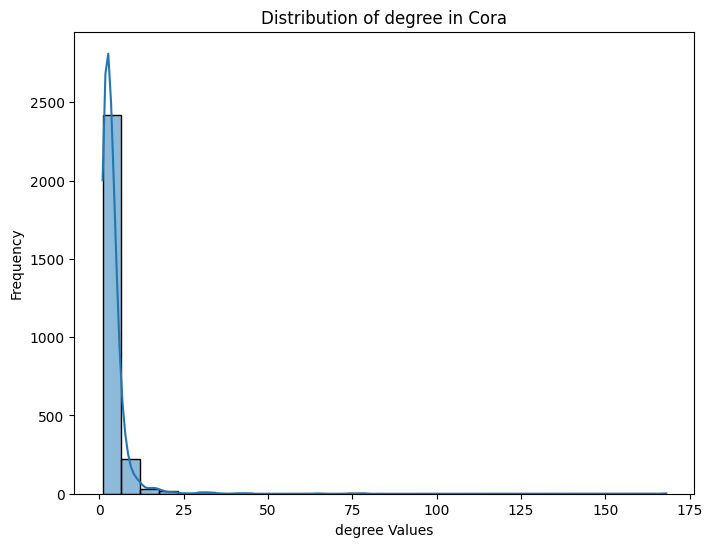

diameter: None


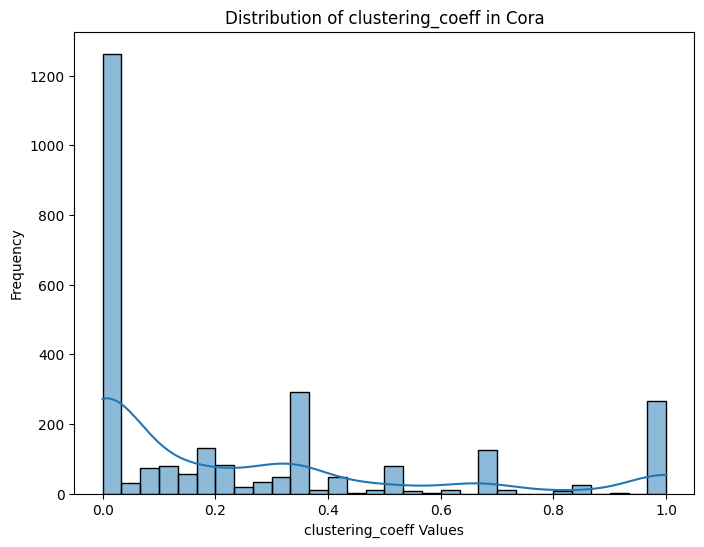

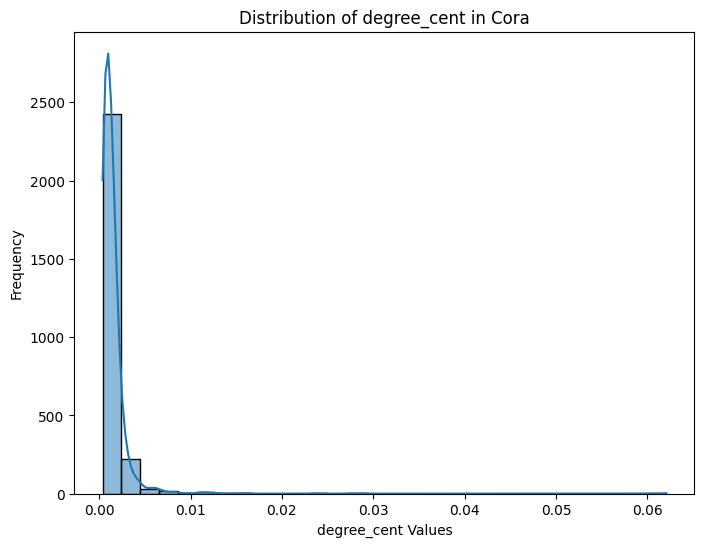

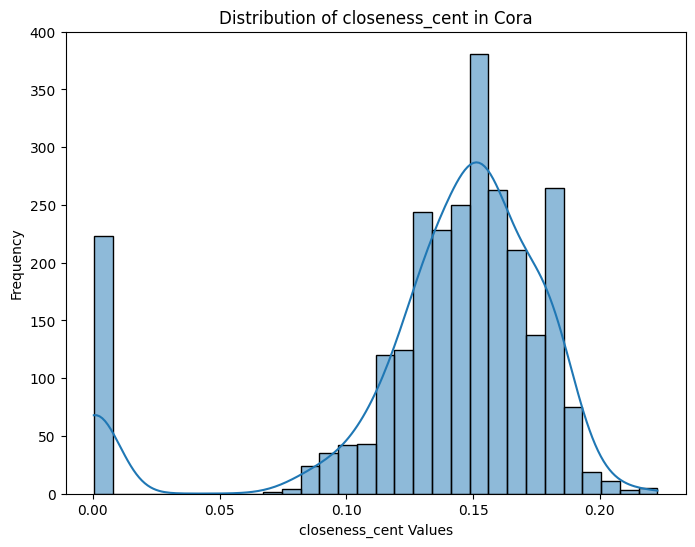

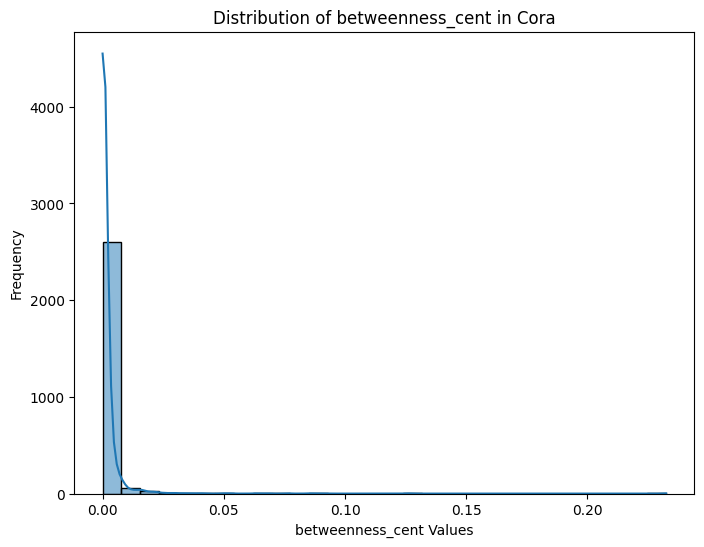

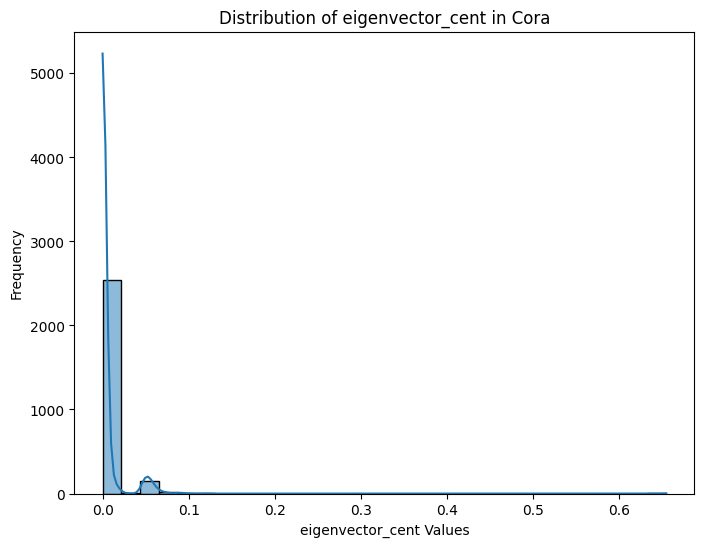

eccentricity: None


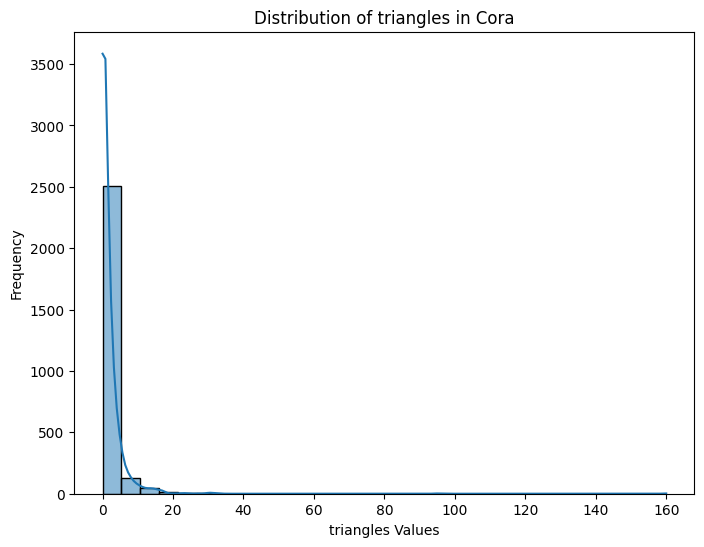

In [ ]:
print("CoraML Metrics Distribution:")
visualize_metrics("Cora", cora_metrics)

In [ ]:
print("PubMed Metrics")
pubmed_metrics = compute_metrics(pubmed_graph)

In [ ]:
def extract_subgraph(graph, edge_type):
    """ Функция для извлечения подграфа для конкретного типа рёбер """
    # Извлекаем узлы и рёбра для заданного типа
    # node_mask = graph.node_type == node_type
    # edge_mask = graph.edge_type == edge_type

    # Создаём подграф с соответствующими узлами и рёбрами
    subgraph = graph.edge_type_subgraph([edge_type])
    return subgraph

def compute_hetero_graph_metrics(graph, edge_types):
    """ Функция для вычисления метрик на подграфах """
    metrics = {}

    for edge_type in edge_types:
        # Извлекаем подграф для конкретного типа узлов и рёбер
        subgraph = extract_subgraph(graph, edge_type)
        print(subgraph)
        if subgraph is not None:
            metrics[edge_type] = compute_metrics(subgraph,  to_undirected=False)

    return metrics



# Пример: Используем подтипы узлов и рёбер
node_types = ogb_graph.node_types
edge_types = ogb_graph.edge_types

print(f"OGB Metrics for:\n node_types={node_types}\n edge_types={edge_types}")


OGB Metrics for:
 node_types=['paper', 'author', 'institution', 'field_of_study']
 edge_types=[('author', 'affiliated_with', 'institution'), ('author', 'writes', 'paper'), ('paper', 'cites', 'paper'), ('paper', 'has_topic', 'field_of_study')]


In [ ]:
ogb_metrics = compute_hetero_graph_metrics(ogb_graph, edge_types)